In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as mp

In [3]:
df = pd.read_csv("Flowcurve_RT.csv")

In [4]:
df

,True strain,Avg.True stress
0,0.0000,379.759745
1,0.0002,531.111195
2,0.0004,597.906447
3,0.0006,637.071251
4,0.0008,669.644323
...,...,...
261,0.0522,1042.225503
262,0.0524,1042.443180
263,0.0526,1042.666445
264,0.0528,1042.831662


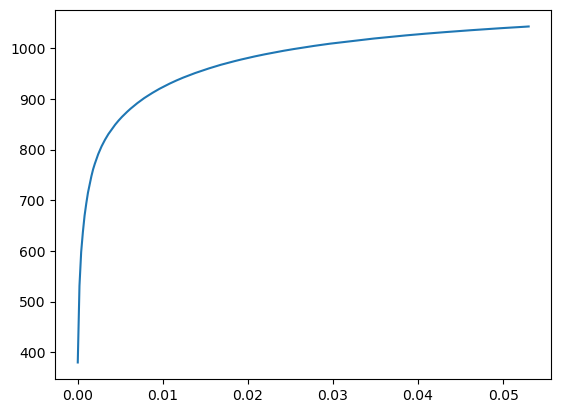

In [5]:
mp.plot(df["True strain"],df["Avg.True stress"])

In [6]:
newdf=pd.read_csv("Disp-Force_ExpRT_ndb50.csv")

In [7]:
newdf

,Disp /mm,Force /kN
0,0.016297,0.537541
1,0.016530,0.318114
2,0.016579,0.340907
3,0.017121,0.372784
4,0.017528,0.409912
...,...,...
994,1.905610,11.360361
995,1.919291,11.213294
996,1.933557,11.052417
997,1.948302,10.875287


In [8]:
li=60


In [9]:
cs=10.2

In [10]:
stress=newdf["Force /kN"]/(0.740*cs)

In [11]:
strain=newdf["Disp /mm"]/li

In [12]:
stress,strain

(0      0.071216
 1      0.042145
 2      0.045165
 3      0.049388
 4      0.054307
          ...   
 994    1.505082
 995    1.485598
 996    1.464284
 997    1.440817
 998    1.413308
 Name: Force /kN, Length: 999, dtype: float64,
 0      0.000272
 1      0.000276
 2      0.000276
 3      0.000285
 4      0.000292
          ...   
 994    0.031760
 995    0.031988
 996    0.032226
 997    0.032472
 998    0.032731
 Name: Disp /mm, Length: 999, dtype: float64)

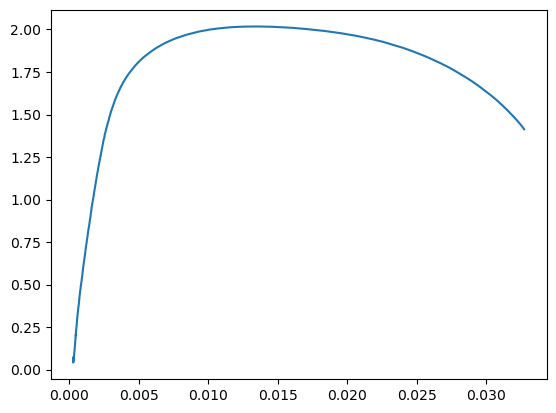

In [13]:
#mp.plot(df["True strain"],df["Avg.True stress"])
mp.plot(strain,stress)
mp.show()

In [14]:
# Import modules
import os
import subprocess

# Define file paths
input_file = 'C:/Users/zopev1/Abaqus Directory/ndb50.inp'
output_file = 'C:/Users/zopev1/Abaqus Directory/output.dat'
abaqus_exe = 'abaqus'

abaqus_cmd = f'{abaqus_exe} job={input_file} user=python interactive ask_delete=OFF output={output_file}'
subprocess.run(abaqus_cmd, shell=True)

# Read output file
with open(output_file, 'r') as f:
    results = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zopev1/Abaqus Directory/output.dat'

In [ ]:
with open(output_file, 'r') as f:
    input = f.read()
input

In [ ]:
from abaqus import *
from abaqusConstants import *

# Set up the job
jobName = 'test'
myModel = mdb.models['Model-1']
myJob = mdb.Job(name=jobName, model=myModel)

# Submit the job
myJob.submit()

In [ ]:
def submit_job():
    myJob = mdb.JobFromInputFile(name="MyJob", inputFileName="MyJob.inp")
    myJob.submit()
    myJob.waitForCompletion()
    print("Job submission complete.")

In [15]:
conda activate Abaqus


Note: you may need to restart the kernel to use updated packages.


In [18]:
import os

main_dir = "MyModel"
input_dir = os.path.join(main_dir, "Input")
output_dir = os.path.join(main_dir, "Output")
scripts_dir = os.path.join(main_dir, "Scripts")

os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)
os.makedirs(scripts_dir, exist_ok=True)

# Step 2: Create a Python script for model setup

from abaqus import *
from abaqusConstants import *
def create_model():
    myModel = mdb.Model(name="MyModel")
    myPart = myModel.Part(name="MyPart", dimensionality=THREE_D, type=DEFORMABLE_BODY)
    # Define materials, loads, and boundary conditions
    # ...
    myModel.rootAssembly.Instance(name="MyPart-1", part=myPart)
    myModel.Job(name="MyJob", model="MyModel")
    myModel.inputKeywordFile = "MyJob.inp"
    myModel.writeInput()
    print("Model setup complete.")

create_model()

AttributeError: 'Model' object has no attribute 'Job'

In [19]:
pip install pyabaqus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
def swift_law(c1,c2,c3,ε):
    σ=c1*(c2+ε)**c3 #3 parameter 
    return(σ)

In [6]:
start = 0
end = 0.05
step = 0.0002

data_list = []
current_value = start

while current_value <= end:
    data_list.append(current_value)
    current_value += step
    

In [9]:
print(data_list)

[0, 0.0002, 0.0004, 0.0006000000000000001, 0.0008, 0.001, 0.0012000000000000001, 0.0014000000000000002, 0.0016000000000000003, 0.0018000000000000004, 0.0020000000000000005, 0.0022000000000000006, 0.0024000000000000007, 0.0026000000000000007, 0.002800000000000001, 0.003000000000000001, 0.003200000000000001, 0.003400000000000001, 0.003600000000000001, 0.0038000000000000013, 0.004000000000000001, 0.004200000000000001, 0.0044, 0.0046, 0.0048, 0.004999999999999999, 0.005199999999999999, 0.0053999999999999986, 0.005599999999999998, 0.005799999999999998, 0.0059999999999999975, 0.006199999999999997, 0.006399999999999997, 0.0065999999999999965, 0.006799999999999996, 0.006999999999999996, 0.0071999999999999955, 0.007399999999999995, 0.007599999999999995, 0.0077999999999999944, 0.007999999999999995, 0.008199999999999995, 0.008399999999999996, 0.008599999999999997, 0.008799999999999997, 0.008999999999999998, 0.009199999999999998, 0.009399999999999999, 0.0096, 0.0098, 0.01, 0.0102, 0.01040000000000

In [15]:
list=[]

In [18]:
for i in data_list:
    list.append((swift_law(1300,2.3e-14,0.075,i)))

In [19]:
import numpy as np
import pandas as pd


In [24]:
df=pd.DataFrame({"strain":data_list,"stress":list})

In [25]:
df

,strain,stress
0,0.0000,123.331195
1,0.0002,686.310435
2,0.0004,722.932670
3,0.0006,745.254653
4,0.0008,761.509107
...,...,...
246,0.0492,1037.148002
247,0.0494,1037.463613
248,0.0496,1037.778044
249,0.0498,1038.091304


In [26]:
import matplotlib.pyplot as mp

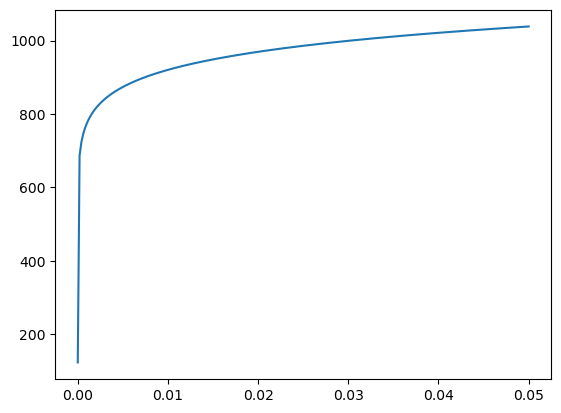

In [27]:
mp.plot(df["strain"],df["stress"])

In [7]:
from abaqus import *
from abaqusConstants import *
import odbAccess
import visualization

odb_path = 'C:\SIMULIA\temp\ndbtest\ndb50.odb'
odb = session.openOdb(odb_path)

field_output = 'U'
step_name = 'Move'

step = odb.steps[step_name]
field_output_object = step.historyRegions['All'].historyOutputs[field_output]

#Extract the data
data = field_output_object.data
time_values = data[:, 0]
output_values = data[:, 1]


for time, value in zip(time_values, output_values):
    print(f"Time: {time:.2f}, Output Value: {value:.4f}")

odb.close()


KeyError: 'Move'

In [9]:
odb_path = 'C:\SIMULIA\temp\ndbtest\ndb50.odb'
odb = session.openOdb(odb_path)

# Step 2: Print available step names
print("Available Steps:")
for step_name in odb.steps.keys():
    print(step_name+"1")

odb.close()

Available Steps:


In [15]:
import os
import subprocess
import logging

# Configure logging
log_file_path = "C:\\SIMULIA\\temp\\your_job_name.log"
logging.basicConfig(filename=log_file_path, level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')

# Directory path where the Abaqus input file is located
directory_path = "C:\\SIMULIA\\temp"

try:
    # Change the current working directory to the specified directory
    os.chdir(directory_path)
    logging.info(f"Changed working directory to {directory_path}")

    name="newnewsabsenew.inp"
    job_name=newnewsabsenew
    # Abaqus command to submit a job
    abaqus_command = f"abaqus job=job_name input="+name
    # Open the Abaqus command using subprocess
    logging.info("Starting Abaqus job...")
    subprocess.call(abaqus_command, shell=True)
    logging.info("Abaqus job submitted successfully.")

except Exception as e:
    logging.error(f"Error occurred: {str(e)}")

# Log file closing
logging.shutdown()
